In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
correlation_matrix = df.corr()
print(correlation_matrix['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [5]:
# Список признаков для удаления
features_to_drop = ['residual sugar','fixed acidity','density','total sulfur dioxide' ,'free sulfur dioxide', 'pH', 'chlorides']
    
# Удаление признаков
df.drop(columns=features_to_drop,axis=1, inplace=True)

In [6]:
df.head()

,volatile acidity,citric acid,sulphates,alcohol,quality
0,0.70,0.00,0.56,9.4,5
1,0.88,0.00,0.68,9.8,5
2,0.76,0.04,0.65,9.8,5
3,0.28,0.56,0.58,9.8,6
4,0.70,0.00,0.56,9.4,5


In [7]:
df.isnull().sum().sum()

0

In [8]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None,5, 10, 15, 20],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']  # Критерий оценки качества
}


In [11]:
regressor = DecisionTreeRegressor()

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [12]:
# Получение лучших параметров и модели
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Лучшие параметры: {best_params}')

Лучшие параметры: {'criterion': 'squared_error', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [13]:
# Прогнозирование с лучшей моделью
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_dt_test = mean_absolute_error(y_test, y_test_pred)
mse_dt_test = mean_squared_error(y_test, y_test_pred)
r2_dt_test = r2_score(y_test, y_test_pred)

print(f'Тестовый набор - MAE: {mae_dt_test}, MSE: {mse_dt_test}, R²: {r2_dt_test}')

Тестовый набор - MAE: 0.5286499672215073, MSE: 0.44825012280819243, R²: 0.29339882118905625


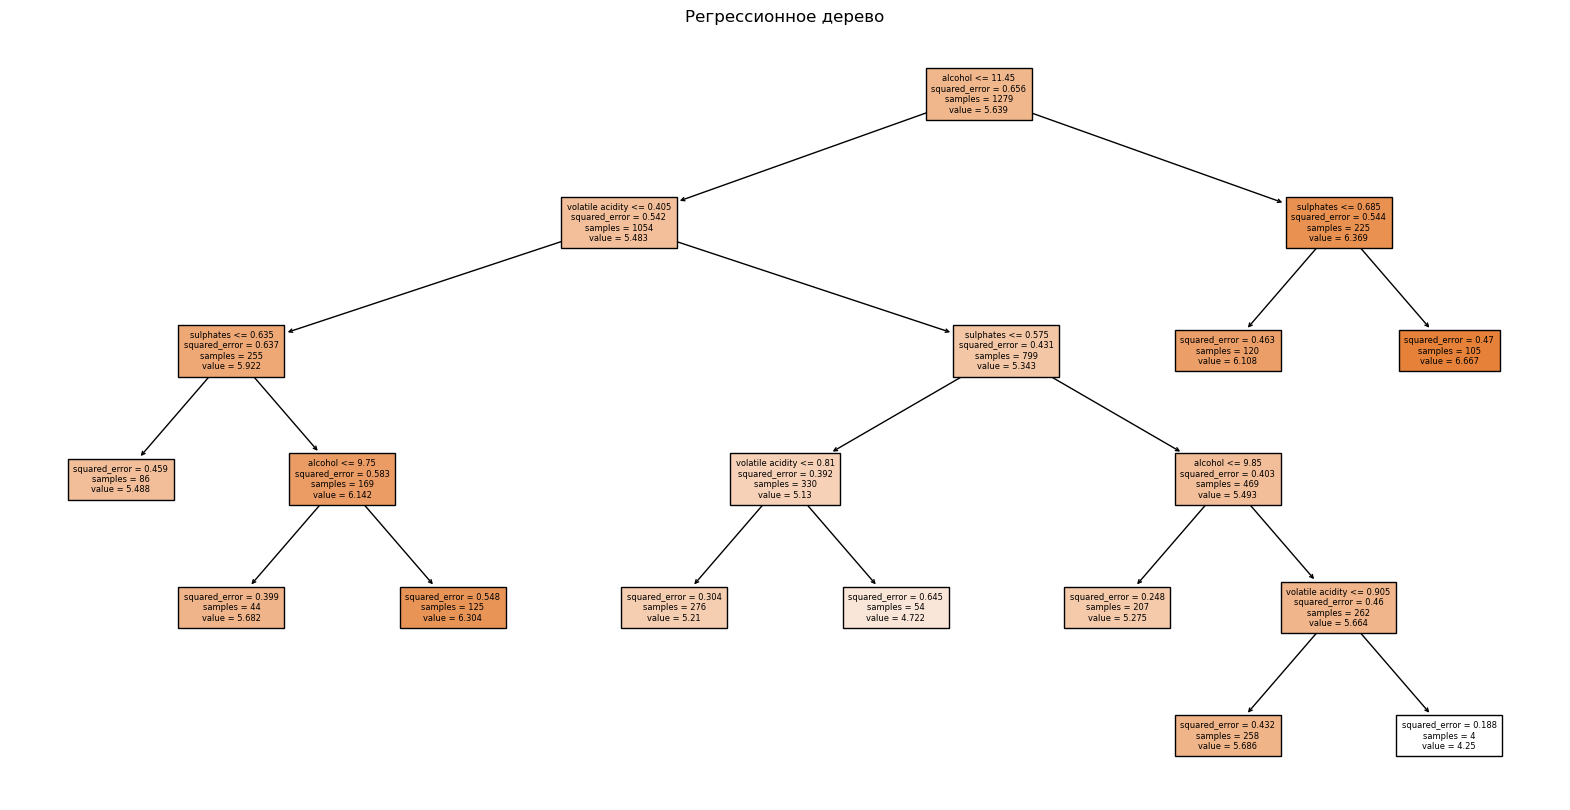

In [22]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names= df.columns[:-1], fontsize=6)
plt.title('Регрессионное дерево')
plt.show()

In [23]:
from sklearn.svm import SVR

param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10,],
    'gamma': ['scale']
}

# SVR с GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_svr_model = grid_search.best_estimator_

In [28]:
# Оценка модели
y_pred = best_svr_model.predict(X_test)
mae_svr_test = mean_absolute_error(y_test, y_pred)
mse_svr_test = mean_squared_error(y_test, y_pred)
r2_svr_test = r2_score(y_test, y_pred)

print(f'Лучшая модель SVR - MAE: {mae_svr_test:.4f}, MSE: {mse_svr_test:.4f}, R²: {r2_svr_test:.4f}')

# Печать лучших параметров
print("Лучшие параметры SVR:", grid_search.best_params_)

Лучшая модель SVR - MAE: 0.4866, MSE: 0.4120, R²: 0.3506
Лучшие параметры SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


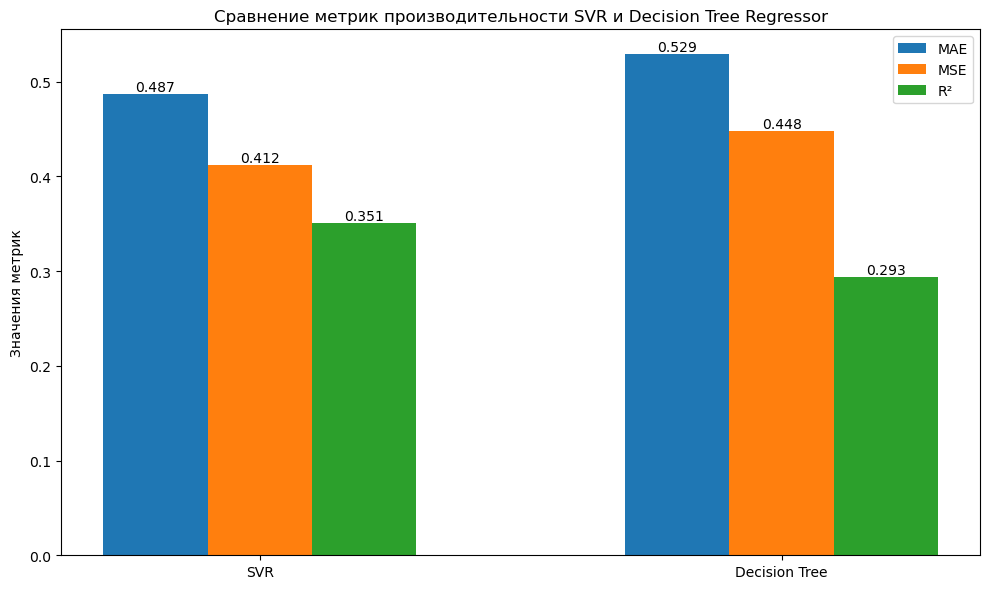

In [34]:
from sklearn.preprocessing import StandardScaler

# Сравнение метрик
metrics = {
    'MAE': [mae_svr_test, mae_dt_test],
    'MSE': [mse_svr_test, mse_dt_test],
    'R²': [r2_svr_test, r2_dt_test]
}

labels = ['SVR', 'Decision Tree']

x = np.arange(len(labels))  # Метки для групп
width = 0.2  # Ширина столбцов

fig, ax = plt.subplots(figsize=(10, 6))

# Построение столбиков для каждой метрики
for i, (metric_name, values) in enumerate(metrics.items()):
    bars = ax.bar(x + i * width, values, width, label=metric_name)

    # Добавим значения над столбцами
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom')

# Настройка графика
ax.set_ylabel('Значения метрик')
ax.set_title('Сравнение метрик производительности SVR и Decision Tree Regressor')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

